# Calcul des coefficients de l'équation différentiel pour les $N$ premiers modes

$$ 
\Big( \alpha_{2N} \frac{d^{2N}}{dt^{2N}} + \alpha_{2N-1} \frac{d^{2N-1}}{dt^{2N-1}} + ... + \alpha_{1} \frac{d}{dt} + \alpha_0 \Big) p = 
    \Big( \beta_{2N-1} \frac{d^{2N-1}}{dt^{2N-1}} + ... + \beta_{1} \frac{d}{dt} \Big) u
$$

## Dénominateur 

$$ D_N(j\omega) = \Pi_{n=1}^{2N} \alpha_n (j\omega)^n $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
N = 4
k = 3
for i in range(k+1):
    for j in range(k+1):
        for l in range(k+1):
            for m in range(k+1):
                if i+j+l+m == k :
                    print(i, j, l,m)

0 0 0 3
0 0 1 2
0 0 2 1
0 0 3 0
0 1 0 2
0 1 1 1
0 1 2 0
0 2 0 1
0 2 1 0
0 3 0 0
1 0 0 2
1 0 1 1
1 0 2 0
1 1 0 1
1 1 1 0
1 2 0 0
2 0 0 1
2 0 1 0
2 1 0 0
3 0 0 0


ça marche mais c'est moche et probablement long...

Et comment on fait pour implémenter un nombre $N$ de boucles ? 

In [13]:
N = 3 
k = 3
B = np.zeros((N,3))
B[:,1] = (k+1)*np.ones(N)
#print(B)

n = len(B) - 1
boucle = True

while boucle:
    if np.sum(B[:,2])==k :
        print(B[:,2])
    
    x=n 
    while True :
        if x==0 and B[0,2]==B[0,1]-1:
            boucle = False
            break
        B[x,2]+=1
        if B[x,2]>=B[x,1]:
            B[x,2] = 0
        else :
            break
        x -= 1
        
#print(B)

[0. 0. 3.]
[0. 1. 2.]
[0. 2. 1.]
[0. 3. 0.]
[1. 0. 2.]
[1. 1. 1.]
[1. 2. 0.]
[2. 0. 1.]
[2. 1. 0.]
[3. 0. 0.]
[[0. 4. 3.]
 [0. 4. 0.]
 [0. 4. 0.]]


Visiblement ça marche mais je comprends pas la forme finale de B...

In [32]:
def indices_exposants(N,k):
    """
    N : nombre de modes du guide considérés
    k : coefficient d'ordre k dans le polynôme (degré de la dérivée)
    
    Renvoit la liste des combinaisons d'exposants nu tels que 
    w^nu1 x ... x w^nuN avec sum(nu_i) = k
    """
    indices = []
    B = np.zeros((N,3))
    B[:,1] = (k+1)*np.ones(N)
    #print(B)

    n = len(B) - 1
    boucle = True

    while boucle:
        if np.sum(B[:,2])==k :
            indices.append(list(B[:,2]))
        
        x=n 
        while True :
            if x==0 and B[0,2]==B[0,1]-1:
                boucle = False
                break
            B[x,2]+=1
            if B[x,2]>=B[x,1]:
                B[x,2] = 0
            else :
                break
            x -= 1
            
    indices = np.array(indices)
    return indices

In [46]:
N = 2   #nombre de modes

f0 = 140
omegas = np.array([i*f0*2*np.pi for i in range(1,N+1)])   # indices allant de 1 à N, à définir avec les valeurs voulues
Qs = 0.5*np.ones(N+1)     # indices allant de 1 à N, à définir avec les valeurs voulues

### Calcul des coefficients alpha
alphas = np.zeros(2*N+1)
alphas[0] = np.prod(omegas**2)
alphas[-1] = 1

for k in range(1,2*N):
    indices = indices_exposants(N,k)
    lines, columns = indices.shape
    for r in range(lines):
        alphas[k]+=np.prod(omegas**indices[r,:])
        ones = np.where(indices[r,:]==1)[0]
        alphas[k] /= np.prod(Qs[ones])

In [47]:
alphas

array([2.39492329e+12, 8.79645943e+03, 1.93444246e+07, 3.60744386e+10,
       1.00000000e+00])

In [48]:
def polynome(coeffs,x):
    n = len(coeffs) # degré du polynôme -1
    xlist = np.array([x**i for i in range(n)])
    return np.sum(coeffs*xlist)

In [55]:
x = np.linspace(0,100,100)
y = np.zeros_like(x)
for i in range(len(x)):
    y[i] = polynome(alphas,x[i])

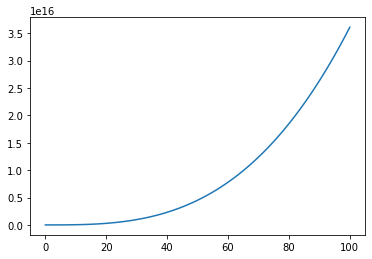

In [56]:
plt.plot(x,y)